# House Prices and Rents Inflation - 2015-2020 Period

### 1 Region and Domain
#### State the region and the domain category that your data sets are about.

Queens, New York, United States
Housing market - Real Estate

### 2 Research Question
#### You must state a question about the domain category and region that you identified as being interesting.

How have the house sale prices affected rent prices over the last 5 years?

### 3 Links
#### You must provide at least two links to publicly accessible datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.

- https://www.kaggle.com/kaijiechen/new-york-city-housing-price-2003-2019/data
- https://files.zillowstatic.com/research/public_csvs/zori/Zip_ZORI_AllHomesPlusMultifamily_SSA.csv?t=1632419535
- https://data.cityofnewyork.us/City-Government/DOF-Summary-of-Neighborhood-Sales-by-Neighborhood-/5ebm-myj7

### 4 Image
#### You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo’s principles of truthfulness, functionality, beauty, and insightfulness.

<img src='house_prices_rents_inflation.png'>

### 5 Discussion
#### You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

The question of how house sale prices affect rent prices can be answered by observing how much prices increment or decrease year by year to then, calculate their rate of inflation over a certain period of time. So, this visualization will show the rate of inflation for sale prices and rents over the last 5 years. The plot also indicates that sales and rent prices follow a similar pattern and by calculating their correlation we obtained a high value.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
house_sale_prices = pd.read_csv('DOF__Summary_of_Neighborhood_Sales_by_Neighborhood_Citywide_by_Borough.csv')
house_sale_prices = house_sale_prices[house_sale_prices['BOROUGH'] == 'QUEENS']

rent_prices = pd.read_csv('rent2.csv')
rent_prices

cities = pd.read_csv('data.csv')

## Cities and Zipcodes
https://www.kaggle.com/kaijiechen/new-york-city-housing-price-2003-2019/data

In [3]:
cities = cities[cities['BOROUGH'] == 4][['NEIGHBORHOOD', 'ZIP CODE']]
cities = cities.drop_duplicates(subset=['ZIP CODE'], keep='first').dropna()
cities['NEIGHBORHOOD'] = cities['NEIGHBORHOOD'].str.strip()
cities

,NEIGHBORHOOD,ZIP CODE
66580,AIRPORT LA GUARDIA,11370.0
66600,ARVERNE,11691.0
66620,ARVERNE,11692.0
67034,ASTORIA,11102.0
67038,ASTORIA,11106.0
...,...,...
103631,SUNNYSIDE,11371.0
194611,BAYSIDE,11359.0
195302,BREEZY POINT,11697.0
200481,FAR ROCKAWAY,11696.0


In [4]:
zipcodes = rent_prices['RegionName'].unique()
neighborhoods = house_sale_prices['NEIGHBORHOOD'].unique()

def get_common_cities(row):
    neighborhood = row['NEIGHBORHOOD']
    zipcode = row['ZIP CODE']
    
    if not(zipcode in zipcodes and neighborhood in neighborhoods):
        row['NEIGHBORHOOD'] = np.nan
        row['ZIP CODE'] = np.nan
    return row

cities = cities.apply(get_common_cities, axis=1).dropna()
cities

,NEIGHBORHOOD,ZIP CODE
67069,ASTORIA,11361.0
67100,ASTORIA,11377.0
67109,ASTORIA,11105.0
67314,ASTORIA,11101.0
68325,BAYSIDE,11360.0
68337,BAYSIDE,11358.0
68716,BAYSIDE,11364.0
70453,BRIARWOOD,11435.0
70581,BRIARWOOD,11432.0
71232,COLLEGE POINT,11354.0


## Rent Prices
https://files.zillowstatic.com/research/public_csvs/zori/Zip_ZORI_AllHomesPlusMultifamily_SSA.csv?t=1632419535

In [5]:
rent_prices = rent_prices.drop(rent_prices[~rent_prices['RegionName'].isin(cities['ZIP CODE'])].index)
rent_prices

,RegionID,RegionName,SizeRank,MsaName,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,...,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08
17,62087,11375,22,"New York, NY",1676.0,1689.0,1701.0,1714.0,1726.0,1738.0,...,2044.0,2041.0,2038.0,2036.0,2034.0,2032.0,2030.0,2029.0,2028.0,2027.0
28,61703,10128,33,"New York, NY",2313.0,2320.0,2328.0,2336.0,2344.0,2352.0,...,2397.0,2386.0,2376.0,2369.0,2361.0,2354.0,2350.0,2346.0,2342.0,2341.0
89,62088,11377,111,"New York, NY",1613.0,1614.0,1614.0,1615.0,1617.0,1618.0,...,1914.0,1908.0,1903.0,1898.0,1892.0,1887.0,1881.0,1876.0,1870.0,1864.0
98,62067,11355,123,"New York, NY",1564.0,NaN,NaN,1588.0,1596.0,1603.0,...,1876.0,1872.0,1867.0,1864.0,1860.0,1857.0,1855.0,1852.0,1850.0,1849.0
123,62093,11385,167,"New York, NY",1711.0,1735.0,1759.0,1783.0,1806.0,1830.0,...,2248.0,2243.0,2239.0,2237.0,2234.0,2231.0,2230.0,2229.0,2228.0,2229.0
133,62085,11373,184,"New York, NY",1465.0,1480.0,NaN,1511.0,1525.0,1540.0,...,1890.0,1892.0,1893.0,1896.0,1898.0,1900.0,1902.0,1904.0,1906.0,1908.0
198,62084,11372,279,"New York, NY",1696.0,NaN,NaN,1723.0,1733.0,1742.0,...,2082.0,2083.0,2084.0,2086.0,2088.0,2090.0,2093.0,2096.0,2099.0,2102.0
271,62004,11101,390,"New York, NY",2530.0,2547.0,2563.0,2579.0,2595.0,2612.0,...,2944.0,2943.0,2943.0,2945.0,2947.0,2950.0,2954.0,2957.0,2961.0,2966.0
383,62066,11354,566,"New York, NY",2002.0,2005.0,2008.0,2012.0,2015.0,2018.0,...,2216.0,2213.0,2210.0,2209.0,2208.0,2206.0,2207.0,2208.0,2209.0,2211.0
472,62086,11374,706,"New York, NY",1679.0,1690.0,1700.0,1711.0,1722.0,1732.0,...,2111.0,2107.0,2102.0,2099.0,2095.0,2091.0,2088.0,2084.0,2081.0,2078.0


In [6]:
years = list(map(str, range(2014, 2021)))
def year_mean(row):
    for year in years:
        years_months = []
        for col in rent_prices.columns:
            if year in col:
                years_months.append(col)
        data = row[years_months]
        row[year] = np.mean(data)
    
    return row

rent_prices = rent_prices.apply(year_mean, axis=1)[years]
rent_prices_2004_2020 = rent_prices.mean().T
rent_prices_2004_2020

2014    1886.792371
2015    1999.920308
2016    2083.193541
2017    2123.504386
2018    2151.692903
2019    2199.176236
2020    2192.613690
dtype: float64

In [7]:
rent_inflation = (rent_prices_2004_2020 - rent_prices_2004_2020.shift()) / rent_prices_2004_2020.shift() * 100
rent_inflation

2014         NaN
2015    5.995781
2016    4.163828
2017    1.935050
2018    1.327453
2019    2.206790
2020   -0.298409
dtype: float64

## House Sale Prices
https://data.cityofnewyork.us/City-Government/DOF-Summary-of-Neighborhood-Sales-by-Neighborhood-/5ebm-myj7

In [8]:
house_sale_prices = house_sale_prices.drop(house_sale_prices[~house_sale_prices['NEIGHBORHOOD'].isin(cities['NEIGHBORHOOD'])].index)
house_sale_prices

,BOROUGH,NEIGHBORHOOD,TYPE OF HOME,NUMBER OF SALES,LOWEST SALE PRICE,AVERAGE SALE PRICE,MEDIAN SALE PRICE,HIGHEST SALE PRICE,YEAR
316,QUEENS,ASTORIA,01 ONE FAMILY HOMES,43,200000,590703,575000,2000000,2010
317,QUEENS,ASTORIA,02 TWO FAMILY HOMES,85,250000,650123,662500,1200000,2010
318,QUEENS,ASTORIA,03 THREE FAMILY HOMES,48,250000,694534,707000,1195813,2010
319,QUEENS,BAYSIDE,01 ONE FAMILY HOMES,259,160000,649349,628500,1900000,2010
320,QUEENS,BAYSIDE,02 TWO FAMILY HOMES,95,236917,751920,772500,1350000,2010
...,...,...,...,...,...,...,...,...,...
6342,QUEENS,GLEN OAKS,01 ONE FAMILY DWELLINGS,13,549000,817063,680000,1619018,2020
6343,QUEENS,GLEN OAKS,02 TWO FAMILY DWELLINGS,1,1050000,1050000,1050000,1050000,2020
6344,QUEENS,GLENDALE,01 ONE FAMILY DWELLINGS,62,470000,695740,689000,1195000,2020
6345,QUEENS,GLENDALE,02 TWO FAMILY DWELLINGS,86,290243,813202,827500,1260000,2020


In [9]:
sale_prices_2014_2020 = house_sale_prices.groupby('YEAR').agg({'AVERAGE SALE PRICE': np.mean}).loc[range(2014, 2021)]
sale_prices_2014_2020

,AVERAGE SALE PRICE
YEAR,
2014,7.288085e+05
2015,7.836530e+05
2016,8.566556e+05
2017,9.299738e+05
2018,9.758602e+05
2019,1.010660e+06
2020,9.966633e+05


In [10]:
sale_price_inflation = (sale_prices_2014_2020 - sale_prices_2014_2020.shift()) / sale_prices_2014_2020.shift() * 100
sale_price_inflation.rename(columns={'AVERAGE SALE PRICE': 'SALE PRICE INFLATION'}, inplace=True)
sale_price_inflation

,SALE PRICE INFLATION
YEAR,
2014,NaN
2015,7.525219
2016,9.315683
2017,8.558660
2018,4.934160
2019,3.566034
2020,-1.384881


In [11]:
sale_price_inflation['RENT PRICE INFLATION'] = rent_inflation.values
sale_price_inflation

,SALE PRICE INFLATION,RENT PRICE INFLATION
YEAR,,
2014,NaN,NaN
2015,7.525219,5.995781
2016,9.315683,4.163828
2017,8.558660,1.935050
2018,4.934160,1.327453
2019,3.566034,2.206790
2020,-1.384881,-0.298409


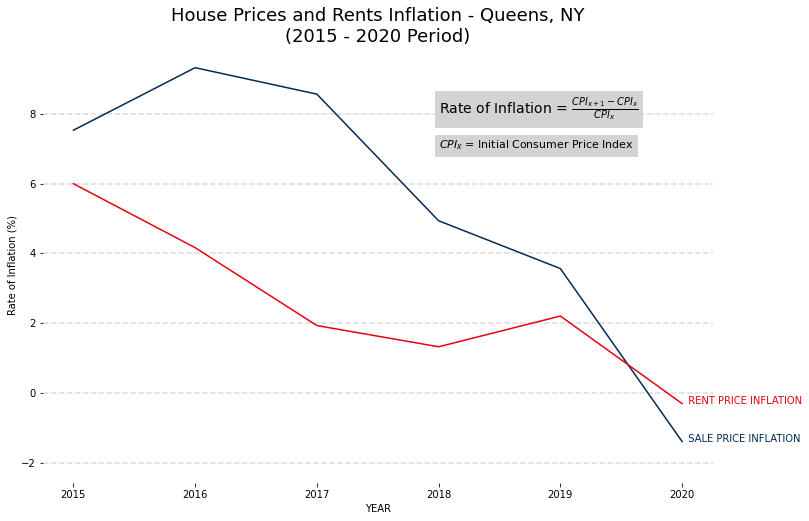

In [14]:
%matplotlib inline

fig = sale_price_inflation.plot(legend=False, figsize=(12, 8), color=['#002A55', '#E4010F'])
# fig.set_ylabel('INFLATION RATE')
for i in range(-2, 9, 2):
    fig.axhline(y=i, xmin=0.0, xmax=1.0, color='gainsboro', ls='dashed', zorder=1)
    
fig.annotate(xy=(2020, sale_price_inflation['RENT PRICE INFLATION'].values[-1]),
             text='  RENT PRICE INFLATION', c='#E4010F')
fig.annotate(xy=(2020, sale_price_inflation['SALE PRICE INFLATION'].values[-1]),
             text='  SALE PRICE INFLATION', c='#002A55')
fig.set_title('House Prices and Rents Inflation - Queens, NY\n(2015 - 2020 Period)', size=18)
fig.set_ylabel('Rate of Inflation (%)')
fig.annotate(xy=(2018, 8), text=r'Rate of Inflation = $\frac{CPI_{x + 1} - CPI_x}{CPI_x}$',
             size=14, backgroundcolor='lightgrey')
fig.annotate(xy=(2018, 7), text=r'$CPI_x$ = Initial Consumer Price Index', size=11, backgroundcolor='lightgrey')
plt.box(False)


plt.savefig('house_prices_rents_inflation.png')
plt.show()

In [13]:
sale_price_inflation.corr()

,SALE PRICE INFLATION,RENT PRICE INFLATION
SALE PRICE INFLATION,1.000000,0.729224
RENT PRICE INFLATION,0.729224,1.000000
